# 日新友日新(일신우일신)

In [182]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# chart 선명하게!
%config InlineBackend.figure_format = 'retina'

In [183]:
# 데이터 읽어오기
path = 'https://bit.ly/AdmissionFile'
data = pd.read_csv(path)

In [184]:
# 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [185]:
# x, y 분리
target = 'ADMIT'
x = data.drop(target, axis=1) # 데이터프레임
y = data[target] # 시리즈

In [186]:
# 학습용, 평가용 8:2 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=123)

In [187]:
# 1단계 : 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [188]:
# 2단계 : 선언하기
model = KNeighborsClassifier()

In [189]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [190]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [191]:
# 5단계: 평가하기
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.89
[[49  4]
 [ 7 40]]


> 89% 맞췄다

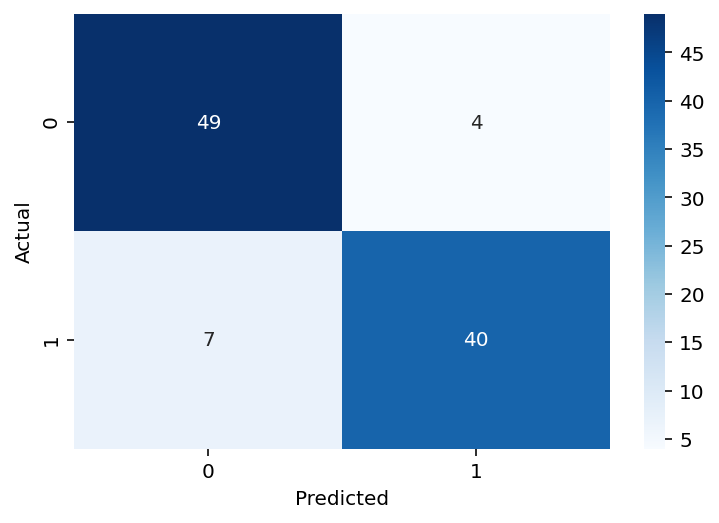

In [192]:
# 혼동행렬 시각화
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# plt.savefig('test.png')

> 전체 갯수중에서 진한색이 맞춘거